In [1]:
import pandas as pd

EVALUATION_FOLDER = "final_evaluation_minbzk"
# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_BM25S.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_keywords_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_keywords_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_keywords_BM25S.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_paraphrase_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_paraphrase_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_paraphrase_BM25S.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_real_words_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_real_words_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_real_words_BM25S.csv"



# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_bert-base-dutch-cased.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_keywords_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_keywords_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_keywords_bert-base-dutch-cased.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_paraphrase_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_paraphrase_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_paraphrase_bert-base-dutch-cased.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_real_words_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_real_words_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_real_words_bert-base-dutch-cased.csv"



# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_all-MiniLM-L6-v2.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_keywords_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_keywords_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_keywords_all-MiniLM-L6-v2.csv"

RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_paraphrase_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_paraphrase_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_paraphrase_all-MiniLM-L6-v2.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_real_words_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_real_words_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_real_words_all-MiniLM-L6-v2.csv"



woo_data = pd.read_csv(f"./{EVALUATION_FOLDER}/results/{RESULTS_FILE}")
base_data = pd.read_csv(f"./docs_minbzk/minbzk_no_requests/woo_merged.csv.gz")

# See how many pages correspond to the dossier
dossier_count = base_data['dossier_id'].value_counts().to_dict()
dossier_dict = base_data.groupby('dossier_id')['document_id'].apply(lambda x: list(set(x))).to_dict()
print(base_data['document_id'].nunique())

410


In [5]:
def calculate_metrics(n):
    ap=[]
    precision=[]
    recall=[]
    f1=[]
    resultsTrue = 0
    resultsFalse = 0
    resultsTrueDocument = 0
    resultsFalseDocument = 0

    for index, row in woo_data.iterrows():
        results = []
        # Get all the data in a list
        for i in range(1, n + 1):
            dossier_col_name = f'dossier#{i}'
            if dossier_col_name in row:
                results.append(row[dossier_col_name])

        # Check results
        resultsTrue += results.count(True)
        resultsFalse += results.count(False)

        correct_documents = dossier_dict[row['dossier_id']]

        tempResultsTrueDocument = set()
        tempResultsFalseDocument = set()
        for i in row['retrieved_document_ids'].split(", ")[:n]:
            if i in correct_documents:
                tempResultsTrueDocument.add(i)
            else:
                tempResultsFalseDocument.add(i)
        resultsTrueDocument += len(tempResultsTrueDocument)
        resultsFalseDocument += len(tempResultsFalseDocument)

        # Calculate Precision
        precision_score = results.count(True) / len(results)
        precision.append(precision_score)

        # Calculate Recall
        total_pages_nr = dossier_count.get(row['dossier_id'], 0)
        # recall_score = results.count(True) / len(results)
        recall_score = results.count(True) / total_pages_nr
        recall.append(recall_score)

        # Calculate f1
        if precision_score + recall_score > 0:
            f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
        else:
            f1_score = 0
        f1.append(f1_score)

        # Calculate MAP1
        average_precision = 0
        for k, result in enumerate(results, 1):
            if not result:
                continue
            average_precision += results[:k].count(True) / k
        
        # average_precision /= total_pages_nr
        average_precision /= len(results)
        ap.append(average_precision)

    print(f"for n = {n}")
    print(resultsTrue)
    print(resultsFalse)
    print(resultsTrueDocument)
    print(resultsFalseDocument)
    return sum(ap) / len(ap), sum(precision) / len(precision), sum(recall) / len(recall), sum(f1) / len(f1)

In [6]:
results = {
    "Metric": ["MAP", "Precision", "Recall", "F1 Score"]
}

for i in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    map_score1, precision, recall, f1 = calculate_metrics(i)
    results[i] = [map_score1, precision, recall, f1]

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Set the 'Metric' column as the index
results_df.set_index("Metric", inplace=True)

pd.set_option('display.max_colwidth', None)
# Display the DataFrame
results_df

for n = 10
206
2144
94
1732
for n = 20
395
4305
117
3200
for n = 30
536
6514
134
4614
for n = 40
664
8736
148
5988
for n = 50
776
10974
158
7219
for n = 60
881
13219
160
8390
for n = 70
981
15464
168
9537
for n = 80
1081
17691
178
10635
for n = 90
1148
19828
181
11637
for n = 100
1194
21389
185
12370


,10,20,30,40,50,60,70,80,90,100
Metric,,,,,,,,,,
MAP,0.064945,0.056274,0.049201,0.044052,0.040223,0.037559,0.035410,0.033910,0.033090,0.033635
Precision,0.087660,0.084043,0.076028,0.070638,0.066043,0.062482,0.059635,0.057500,0.054279,0.050809
Recall,0.020203,0.025253,0.029204,0.032220,0.034192,0.035776,0.037041,0.038959,0.041167,0.042165
F1 Score,0.015260,0.019180,0.020798,0.022341,0.023245,0.023926,0.024408,0.025191,0.025297,0.025250


test

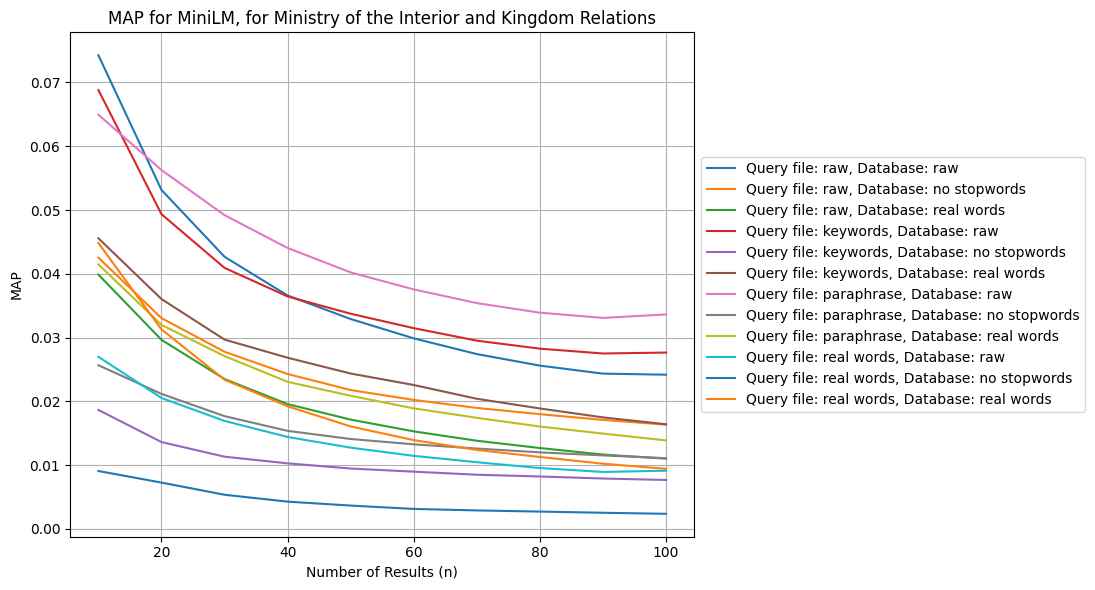

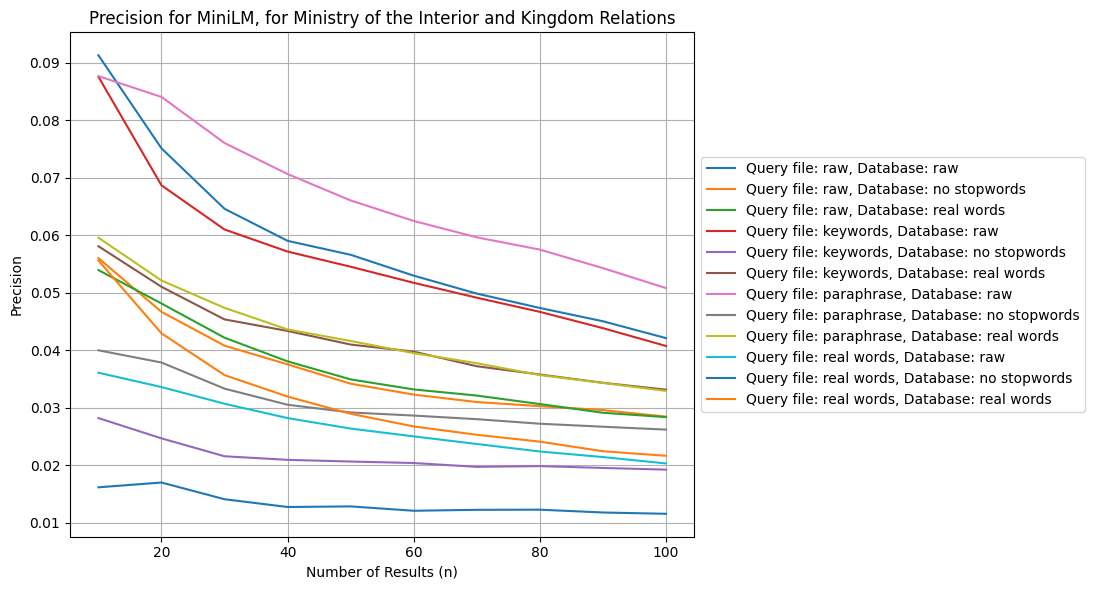

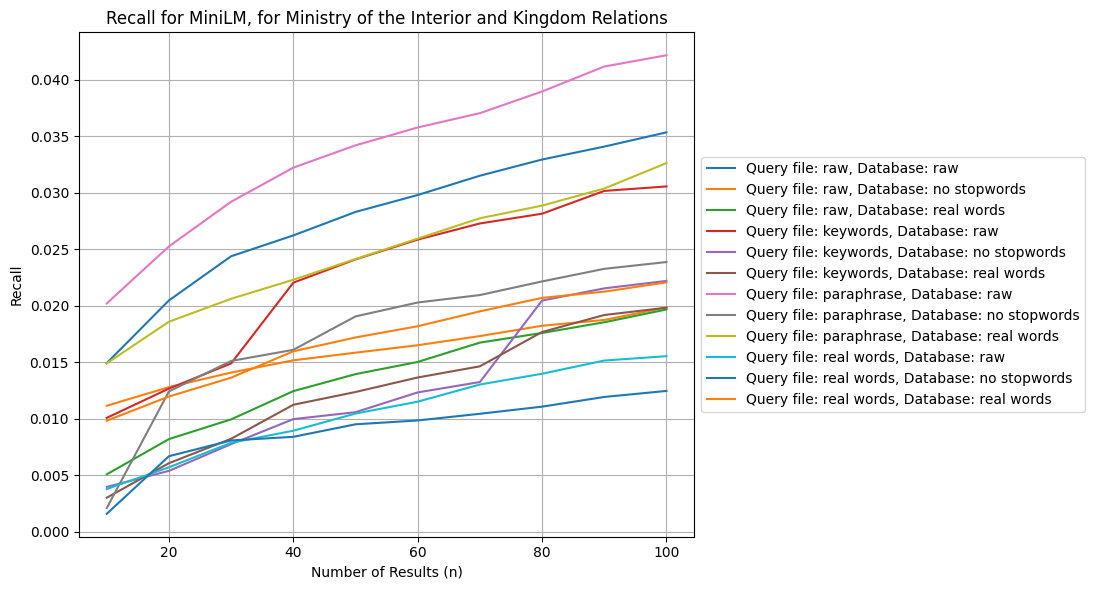

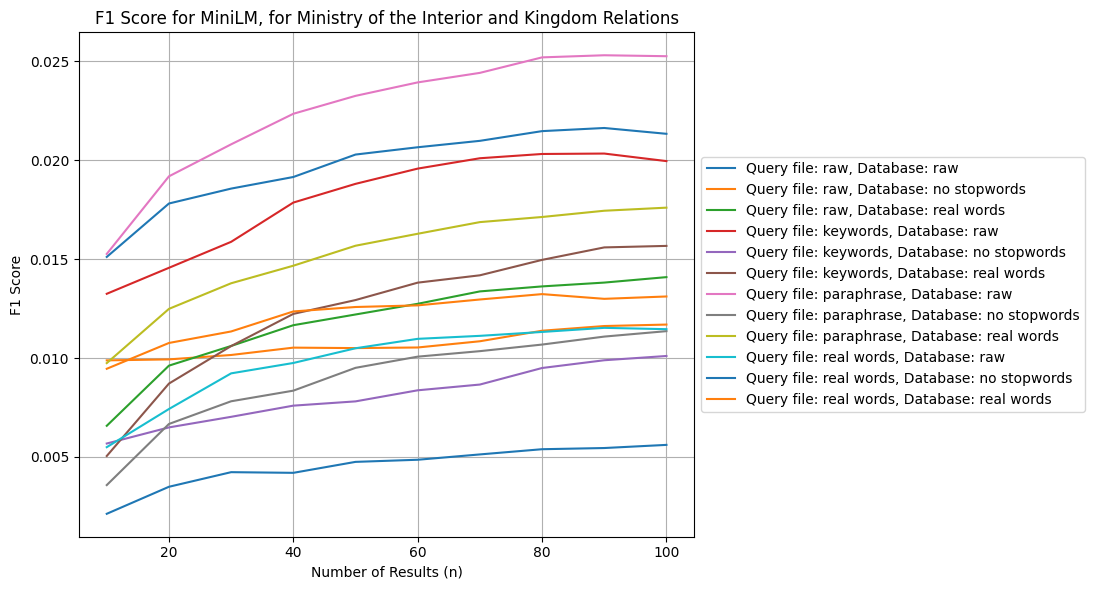

In [4]:
import os

# Directory containing the evaluation results
EVALUATION_FOLDER = "final_evaluation_minbzk/results"

# List of CSV files
# csv_files = [
#     "evaluation_minbzk_no_requests_minbzk_BM25S.csv",
#     "evaluation_minbzk_no_requests_stem_stopwords_minbzk_BM25S.csv",
#     "evaluation_minbzk_no_requests_real_words_minbzk_BM25S.csv",
#     "evaluation_minbzk_no_requests_minbzk_keywords_BM25S.csv",
#     "evaluation_minbzk_no_requests_stem_stopwords_minbzk_keywords_BM25S.csv",
#     "evaluation_minbzk_no_requests_real_words_minbzk_keywords_BM25S.csv",
#     "evaluation_minbzk_no_requests_minbzk_paraphrase_BM25S.csv",
#     "evaluation_minbzk_no_requests_stem_stopwords_minbzk_paraphrase_BM25S.csv",
#     "evaluation_minbzk_no_requests_real_words_minbzk_paraphrase_BM25S.csv",
#     "evaluation_minbzk_no_requests_minbzk_real_words_BM25S.csv",
#     "evaluation_minbzk_no_requests_stem_stopwords_minbzk_real_words_BM25S.csv",
#     "evaluation_minbzk_no_requests_real_words_minbzk_real_words_BM25S.csv"
# ]
# csv_files = [
#     "evaluation_minbzk_no_requests_minbzk_bert-base-dutch-cased.csv",
#     "evaluation_minbzk_no_requests_stem_stopwords_minbzk_bert-base-dutch-cased.csv",
#     "evaluation_minbzk_no_requests_real_words_minbzk_bert-base-dutch-cased.csv",
#     "evaluation_minbzk_no_requests_minbzk_keywords_bert-base-dutch-cased.csv",
#     "evaluation_minbzk_no_requests_stem_stopwords_minbzk_keywords_bert-base-dutch-cased.csv",
#     "evaluation_minbzk_no_requests_real_words_minbzk_keywords_bert-base-dutch-cased.csv",
#     "evaluation_minbzk_no_requests_minbzk_paraphrase_bert-base-dutch-cased.csv",
#     "evaluation_minbzk_no_requests_stem_stopwords_minbzk_paraphrase_bert-base-dutch-cased.csv",
#     "evaluation_minbzk_no_requests_real_words_minbzk_paraphrase_bert-base-dutch-cased.csv",
#     "evaluation_minbzk_no_requests_minbzk_real_words_bert-base-dutch-cased.csv",
#     "evaluation_minbzk_no_requests_stem_stopwords_minbzk_real_words_bert-base-dutch-cased.csv",
#     "evaluation_minbzk_no_requests_real_words_minbzk_real_words_bert-base-dutch-cased.csv"
# ]
csv_files = [
    "evaluation_minbzk_no_requests_minbzk_all-MiniLM-L6-v2.csv",
    "evaluation_minbzk_no_requests_stem_stopwords_minbzk_all-MiniLM-L6-v2.csv",
    "evaluation_minbzk_no_requests_real_words_minbzk_all-MiniLM-L6-v2.csv",
    "evaluation_minbzk_no_requests_minbzk_keywords_all-MiniLM-L6-v2.csv",
    "evaluation_minbzk_no_requests_stem_stopwords_minbzk_keywords_all-MiniLM-L6-v2.csv",
    "evaluation_minbzk_no_requests_real_words_minbzk_keywords_all-MiniLM-L6-v2.csv",
    "evaluation_minbzk_no_requests_minbzk_paraphrase_all-MiniLM-L6-v2.csv",
    "evaluation_minbzk_no_requests_stem_stopwords_minbzk_paraphrase_all-MiniLM-L6-v2.csv",
    "evaluation_minbzk_no_requests_real_words_minbzk_paraphrase_all-MiniLM-L6-v2.csv",
    "evaluation_minbzk_no_requests_minbzk_real_words_all-MiniLM-L6-v2.csv",
    "evaluation_minbzk_no_requests_stem_stopwords_minbzk_real_words_all-MiniLM-L6-v2.csv",
    "evaluation_minbzk_no_requests_real_words_minbzk_real_words_all-MiniLM-L6-v2.csv"
]
labels = [
    "Query file: raw, Database: raw",
    "Query file: raw, Database: no stopwords",
    "Query file: raw, Database: real words",
    "Query file: keywords, Database: raw",
    "Query file: keywords, Database: no stopwords",
    "Query file: keywords, Database: real words",
    "Query file: paraphrase, Database: raw",
    "Query file: paraphrase, Database: no stopwords",
    "Query file: paraphrase, Database: real words",
    "Query file: real words, Database: raw",
    "Query file: real words, Database: no stopwords",
    "Query file: real words, Database: real words"
]

# Store the results for each CSV
results_dict = {}

# Loop through the CSV files and calculate metrics
for csv_file in csv_files:
    file_path = os.path.join(EVALUATION_FOLDER, csv_file)
    
    # Read the data
    woo_data = pd.read_csv(file_path)
    
    # Call the calculate_metrics() function for each dataset
    results = {}
    for i in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
        map_score, precision, recall, f1 = calculate_metrics(i)
        results[i] = [map_score, precision, recall, f1]
    
    # Store the results in a DataFrame for each file
    results_df = pd.DataFrame(results, index=["MAP", "Precision", "Recall", "F1 Score"])
    
    # Add the DataFrame to the dictionary
    results_dict[csv_file] = results_df

import matplotlib.pyplot as plt

# Create 4 subplots for each metric
metrics = ["MAP", "Precision", "Recall", "F1 Score"]

# Iterate over each metric
for metric in metrics:
    plt.figure(figsize=(13, 6))  # Adjust the size as needed
    
    # Plot each CSV file's results for the current metric
    for index, (csv_file, df) in enumerate(results_dict.items()):
        # Remove the common part from the filename for labeling
        label = labels[index]
        
        # Plot the results with the cleaned label
        plt.plot(df.columns, df.loc[metric], label=label)
    
    # Adding titles and labels
    plt.title(f"{metric} for MiniLM, for Ministry of the Interior and Kingdom Relations")
    plt.xlabel("Number of Results (n)")
    plt.ylabel(metric)
    
    # Move the legend outside of the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.grid(True)
    
    # Adjust layout so the plot doesn't get cut off
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # This gives space for the legend
    
    # Display the plot
    plt.show()


In [101]:
results = {
    "Metric": ["MAP", "Precision", "Recall", "F1 Score"]
}

for i in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    map_score1, precision, recall, f1 = calculate_metrics(i)
    results[i] = [map_score1, precision, recall, f1]

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Set the 'Metric' column as the index
results_df.set_index("Metric", inplace=True)

pd.set_option('display.max_colwidth', None)
# Display the DataFrame
results_df

,10,20,30,40,50,60,70,80,90,100
Metric,,,,,,,,,,
MAP,0.633015,0.574035,0.537631,0.509159,0.481974,0.459506,0.439256,0.420001,0.400935,0.383830
Precision,0.665975,0.610996,0.578423,0.551660,0.525560,0.503527,0.484232,0.466234,0.448317,0.431992
Recall,0.122209,0.190390,0.233384,0.269188,0.302173,0.326597,0.347893,0.370850,0.393821,0.411990
F1 Score,0.156770,0.206918,0.236436,0.255969,0.268976,0.277413,0.282996,0.287681,0.289955,0.290912
